In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_auc_score, f1_score, roc_curve
import seaborn as sns
# prompt: give code uploading data set for this project

from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['amazon_prime_titles.csv']))
df.head(3)

Saving amazon_prime_titles.csv to amazon_prime_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...


# Data preprocessing and feature extraction

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64


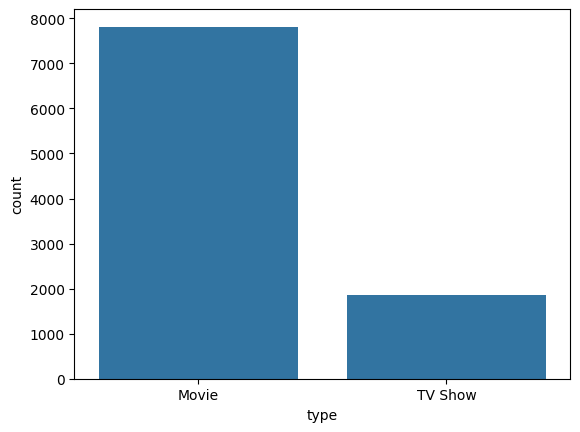

In [ ]:
sns.countplot(x='type', data=df)
plt.show()

In [ ]:
scan_data = df[df['rating'].notna()]
scan_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
16,s17,Movie,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",NaN,NaN,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...
17,s18,TV Show,Zoo Babies,NaN,Narrator - Gillian Barlett,NaN,NaN,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...


In [ ]:

# Vectorize descriptions using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X_text = vectorizer.fit_transform(scan_data['description']).toarray()


In [ ]:
# Combine features


# Encode categorical variables
encoder = LabelEncoder()
scan_data['rating_encoded'] = encoder.fit_transform(scan_data['rating'])
scan_data['release_year_encoded'] = encoder.fit_transform(scan_data['release_year'])
scan_data['listed_in_encoded'] = encoder.fit_transform(scan_data['listed_in'])



<ipython-input-13-dfdd7960d591>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scan_data['rating_encoded'] = encoder.fit_transform(scan_data['rating'])
<ipython-input-13-dfdd7960d591>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scan_data['release_year_encoded'] = encoder.fit_transform(scan_data['release_year'])
<ipython-input-13-dfdd7960d591>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [ ]:
Selected_variables = pd.concat(
    [pd.DataFrame(X_text), scan_data[['rating_encoded']].reset_index(drop=True),scan_data[['release_year_encoded']].reset_index(drop=True)
    ,scan_data[['listed_in_encoded']].reset_index(drop=True)],
    axis=1,
)

# Target variable
y = scan_data['type']

In [ ]:
Selected_variables

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,rating_encoded,release_year_encoded,listed_in_encoded
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0,96,384
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0,94,452
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,7,86,472
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.166381,0.0,0.0,0.000000,0.0,0.0,0.0,3,98,315
4,0.151449,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,15,96,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.542402,0.0,0.0,0.0,4,18,259
9327,0.000000,0.0,0.0,0.0,0.282449,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0,96,507
9328,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,15,86,0
9329,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,18,99,417


# Data partition

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(Selected_variables, y, test_size=0.3, random_state=42)


# Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


===============================================Training Results==============================================
0.870463941203491
              precision    recall  f1-score   support

       Movie       0.87      0.98      0.92      5275
     TV Show       0.83      0.41      0.55      1256

    accuracy                           0.87      6531
   macro avg       0.85      0.69      0.74      6531
weighted avg       0.87      0.87      0.85      6531



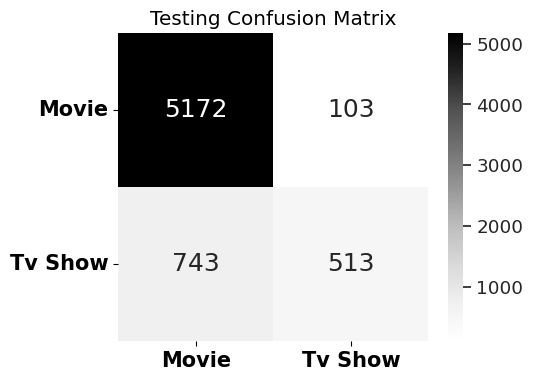

===============================================Testing Results==============================================
0.8475
              precision    recall  f1-score   support

       Movie       0.86      0.97      0.91      2208
     TV Show       0.77      0.40      0.52       592

    accuracy                           0.85      2800
   macro avg       0.81      0.68      0.72      2800
weighted avg       0.84      0.85      0.83      2800



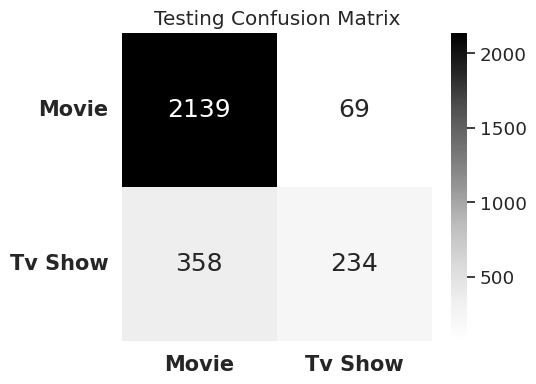

In [ ]:

# Convert all column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Now you can fit the model
LR = LogisticRegression()
LR.fit(X_train, y_train)
print("===============================================Training Results==============================================")
Pred_labels = LR.predict(X_train)
print(metrics.accuracy_score(y_train, Pred_labels))
confusion_matrix(y_train, Pred_labels)
print(classification_report(y_train, Pred_labels))
cm = confusion_matrix(y_train, Pred_labels)
plt.figure(figsize = (5,4))
ax= plt.subplot()
sns.set(font="Times New Roman")#font style
sns.set(font_scale=1.2)#font scale
ax.xaxis.set_label_position("top")
sns.heatmap(cm, annot=True,cmap="Greys",annot_kws={"size":18}, fmt="d")
ax.xaxis.set_ticklabels(['Movie', 'Tv Show'],fontsize = 15,fontweight='bold')#x-axis label
ax.yaxis.set_ticklabels(['Movie', 'Tv Show'],rotation=0,fontsize = 15,fontweight='bold')#y-axis label
plt.title('Testing Confusion Matrix')
plt.show()

print("===============================================Testing Results==============================================")

Pred_labels = LR.predict(X_test)
print(metrics.accuracy_score(y_test, Pred_labels))
confusion_matrix(y_test, Pred_labels)
print(classification_report(y_test, Pred_labels))
cm = confusion_matrix(y_test, Pred_labels)
plt.figure(figsize = (5,4))
ax= plt.subplot()
sns.set(font="Times New Roman")#font style
sns.set(font_scale=1.2)#font scale
ax.xaxis.set_label_position("top")
sns.heatmap(cm, annot=True,cmap="Greys",annot_kws={"size":18}, fmt="d")
ax.xaxis.set_ticklabels(['Movie', 'Tv Show'],fontsize = 15,fontweight='bold')#x-axis label
ax.yaxis.set_ticklabels(['Movie', 'Tv Show'],rotation=0,fontsize = 15,fontweight='bold')#y-axis label
plt.title('Testing Confusion Matrix')
plt.show()

# KNN

===============================================Training Results==============================================
0.904302557035676
              precision    recall  f1-score   support

       Movie       0.91      0.98      0.94      5275
     TV Show       0.86      0.60      0.71      1256

    accuracy                           0.90      6531
   macro avg       0.89      0.79      0.83      6531
weighted avg       0.90      0.90      0.90      6531



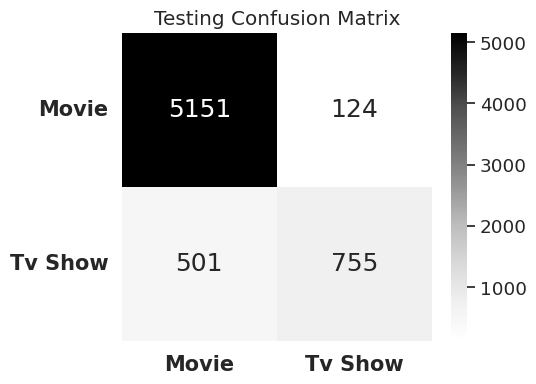

===============================================Testing Results==============================================
0.8592857142857143
              precision    recall  f1-score   support

       Movie       0.88      0.96      0.91      2208
     TV Show       0.75      0.50      0.60       592

    accuracy                           0.86      2800
   macro avg       0.81      0.73      0.76      2800
weighted avg       0.85      0.86      0.85      2800



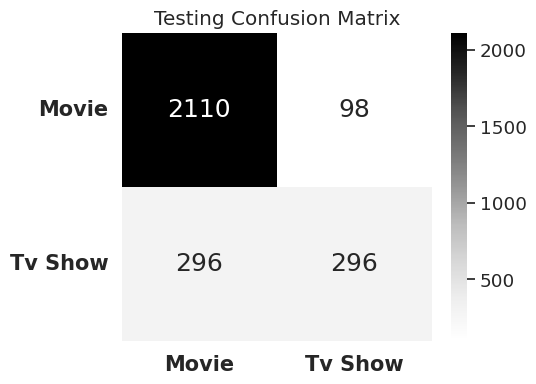

In [ ]:
KNN=KNeighborsClassifier()
KNN.fit(X_train ,y_train)
print("===============================================Training Results==============================================")
Pred_labels = KNN.predict(X_train)
print(metrics.accuracy_score(y_train, Pred_labels))
confusion_matrix(y_train, Pred_labels)
print(classification_report(y_train, Pred_labels))
cm = confusion_matrix(y_train, Pred_labels)
plt.figure(figsize = (5,4))
ax= plt.subplot()
sns.set(font="Times New Roman")#font style
sns.set(font_scale=1.2)#font scale
ax.xaxis.set_label_position("top")
sns.heatmap(cm, annot=True,cmap="Greys",annot_kws={"size":18}, fmt="d")
ax.xaxis.set_ticklabels(['Movie', 'Tv Show'],fontsize = 15,fontweight='bold')#x-axis label
ax.yaxis.set_ticklabels(['Movie', 'Tv Show'],rotation=0,fontsize = 15,fontweight='bold')#y-axis label
plt.title('Testing Confusion Matrix')
plt.show()
print("===============================================Testing Results==============================================")

Pred_labels = KNN.predict(X_test)
print(metrics.accuracy_score(y_test, Pred_labels))
confusion_matrix(y_test, Pred_labels)
print(classification_report(y_test, Pred_labels))
cm = confusion_matrix(y_test, Pred_labels)
plt.figure(figsize = (5,4))
ax= plt.subplot()
sns.set(font="Times New Roman")#font style
sns.set(font_scale=1.2)#font scale
ax.xaxis.set_label_position("top")
sns.heatmap(cm, annot=True,cmap="Greys",annot_kws={"size":18}, fmt="d")
ax.xaxis.set_ticklabels(['Movie', 'Tv Show'],fontsize = 15,fontweight='bold')#x-axis label
ax.yaxis.set_ticklabels(['Movie', 'Tv Show'],rotation=0,fontsize = 15,fontweight='bold')#y-axis label
plt.title('Testing Confusion Matrix')
plt.show()

# Decision Tree

===============================================Training Results==============================================
0.9996937681825142
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      5275
     TV Show       1.00      1.00      1.00      1256

    accuracy                           1.00      6531
   macro avg       1.00      1.00      1.00      6531
weighted avg       1.00      1.00      1.00      6531



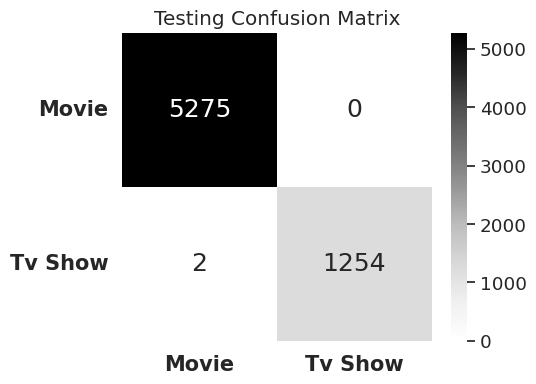

===============================================Testing Results==============================================
0.8628571428571429
              precision    recall  f1-score   support

       Movie       0.91      0.92      0.91      2208
     TV Show       0.68      0.66      0.67       592

    accuracy                           0.86      2800
   macro avg       0.80      0.79      0.79      2800
weighted avg       0.86      0.86      0.86      2800



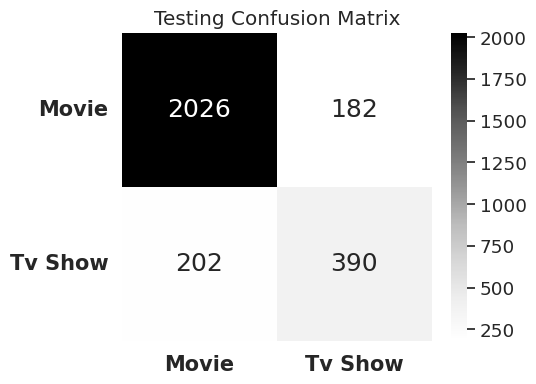

In [ ]:
DT=DecisionTreeClassifier()
DT.fit(X_train ,y_train)
print("===============================================Training Results==============================================")
Pred_labels = DT.predict(X_train)
print(metrics.accuracy_score(y_train, Pred_labels))
confusion_matrix(y_train, Pred_labels)
print(classification_report(y_train, Pred_labels))
cm = confusion_matrix(y_train, Pred_labels)
plt.figure(figsize = (5,4))
ax= plt.subplot()
sns.set(font="Times New Roman")#font style
sns.set(font_scale=1.2)#font scale
ax.xaxis.set_label_position("top")
sns.heatmap(cm, annot=True,cmap="Greys",annot_kws={"size":18}, fmt="d")
ax.xaxis.set_ticklabels(['Movie', 'Tv Show'],fontsize = 15,fontweight='bold')#x-axis label
ax.yaxis.set_ticklabels(['Movie', 'Tv Show'],rotation=0,fontsize = 15,fontweight='bold')#y-axis label
plt.title('Testing Confusion Matrix')
plt.show()

print("===============================================Testing Results==============================================")

Pred_labels = DT.predict(X_test)
print(metrics.accuracy_score(y_test, Pred_labels))
confusion_matrix(y_test, Pred_labels)
print(classification_report(y_test, Pred_labels))
cm = confusion_matrix(y_test, Pred_labels)
plt.figure(figsize = (5,4))
ax= plt.subplot()
sns.set(font="Times New Roman")#font style
sns.set(font_scale=1.2)#font scale
ax.xaxis.set_label_position("top")
sns.heatmap(cm, annot=True,cmap="Greys",annot_kws={"size":18}, fmt="d")
ax.xaxis.set_ticklabels(['Movie', 'Tv Show'],fontsize = 15,fontweight='bold')#x-axis label
ax.yaxis.set_ticklabels(['Movie', 'Tv Show'],rotation=0,fontsize = 15,fontweight='bold')#y-axis label
plt.title('Testing Confusion Matrix')
plt.show()

# Random Forest

===============================================Training Results==============================================
0.9996937681825142
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      5275
     TV Show       1.00      1.00      1.00      1256

    accuracy                           1.00      6531
   macro avg       1.00      1.00      1.00      6531
weighted avg       1.00      1.00      1.00      6531



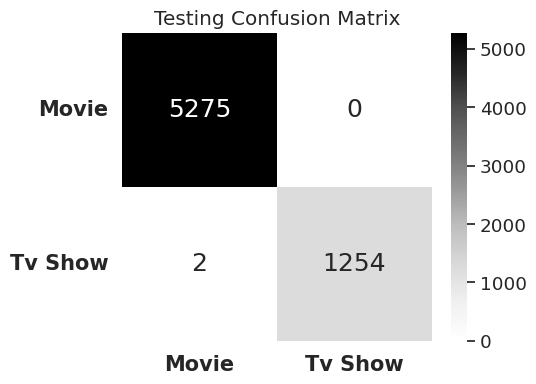

===============================================Testing Results==============================================
0.9060714285714285
              precision    recall  f1-score   support

       Movie       0.90      0.99      0.94      2208
     TV Show       0.94      0.59      0.73       592

    accuracy                           0.91      2800
   macro avg       0.92      0.79      0.84      2800
weighted avg       0.91      0.91      0.90      2800



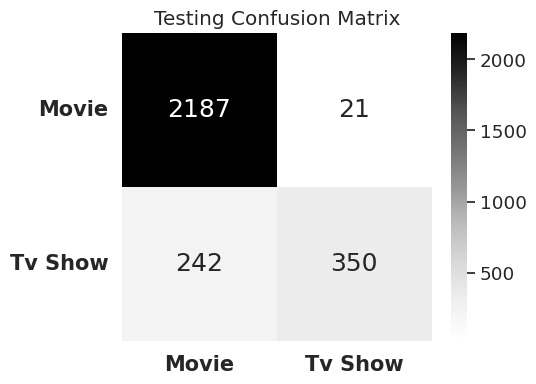

In [ ]:
RF=RandomForestClassifier()
RF.fit(X_train ,y_train)
print("===============================================Training Results==============================================")
Pred_labels = RF.predict(X_train)
print(metrics.accuracy_score(y_train, Pred_labels))
confusion_matrix(y_train, Pred_labels)
print(classification_report(y_train, Pred_labels))
cm = confusion_matrix(y_train, Pred_labels)
plt.figure(figsize = (5,4))
ax= plt.subplot()
sns.set(font="Times New Roman")#font style
sns.set(font_scale=1.2)#font scale
ax.xaxis.set_label_position("top")
sns.heatmap(cm, annot=True,cmap="Greys",annot_kws={"size":18}, fmt="d")
ax.xaxis.set_ticklabels(['Movie', 'Tv Show'],fontsize = 15,fontweight='bold')#x-axis label
ax.yaxis.set_ticklabels(['Movie', 'Tv Show'],rotation=0,fontsize = 15,fontweight='bold')#y-axis label
plt.title('Testing Confusion Matrix')
plt.show()

print("===============================================Testing Results==============================================")

Pred_labels = RF.predict(X_test)
print(metrics.accuracy_score(y_test, Pred_labels))
confusion_matrix(y_test, Pred_labels)
print(classification_report(y_test, Pred_labels))
cm = confusion_matrix(y_test, Pred_labels)
plt.figure(figsize = (5,4))
ax= plt.subplot()
sns.set(font="Times New Roman")#font style
sns.set(font_scale=1.2)#font scale
ax.xaxis.set_label_position("top")
sns.heatmap(cm, annot=True,cmap="Greys",annot_kws={"size":18}, fmt="d")
ax.xaxis.set_ticklabels(['Movie', 'Tv Show'],fontsize = 15,fontweight='bold')#x-axis label
ax.yaxis.set_ticklabels(['Movie', 'Tv Show'],rotation=0,fontsize = 15,fontweight='bold')#y-axis label
plt.title('Testing Confusion Matrix')
plt.show()

In [ ]:
import numpy as np

def mse(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

def rmse(y_true, y_pred):
  return np.sqrt(mse(y_true, y_pred))

def rae(y_true, y_pred):
  return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))

def rrse(y_true, y_pred):
  return np.sqrt(np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))

# Example usage (replace with your actual true and predicted values)
y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.1, 1.9, 3.2, 3.8, 5.1])

print(f"Mean Absolute Error: {mse(y_true, y_pred)}")
print(f"Root Mean Absolute Error : {rmse(y_true, y_pred)}")
print(f"Relative Absolute Error: {rae(y_true, y_pred)}")
print(f"Root Relative Squared Error: {rrse(y_true, y_pred)}")

Mean Absolute Error: 0.02200000000000002
Root Mean Absolute Error : 0.14832396974191334
Relative Absolute Error: 0.1166666666666667
Root Relative Squared Error: 0.1048808848170152


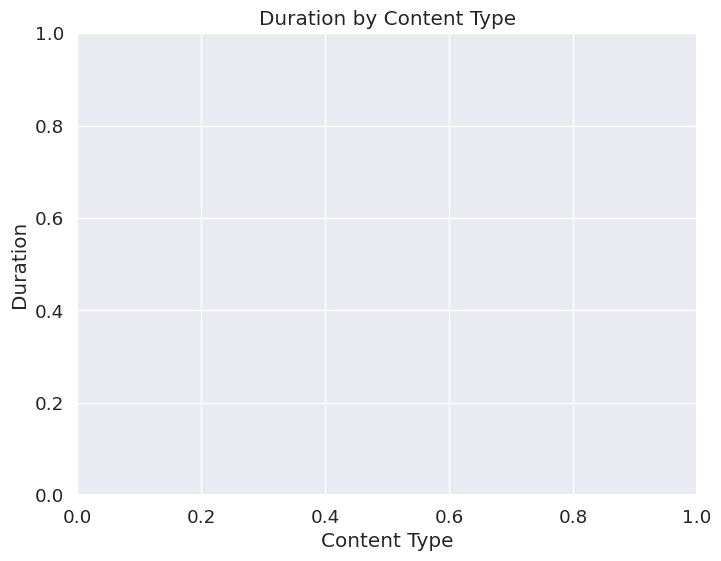

In [ ]:
# Example: Boxplot of 'duration' by 'type'
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='duration', data=data)
plt.title('Duration by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.show()

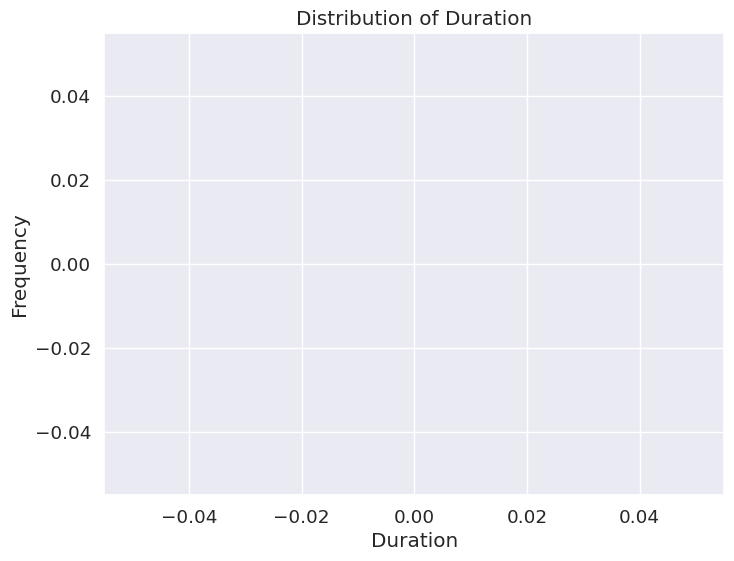

In [ ]:
# Example:  Distribution of 'duration'
plt.figure(figsize=(8, 6))
sns.histplot(data['duration'], kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

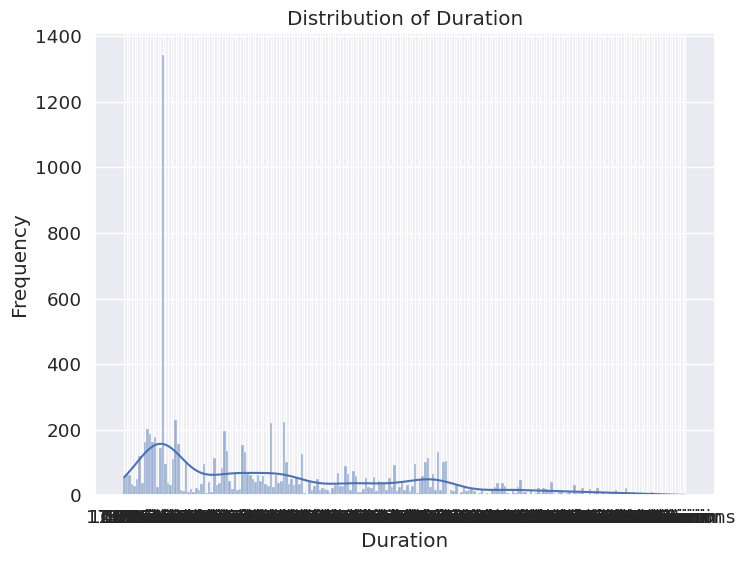

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Example:  Distribution of 'duration' (assuming 'data' is defined)
plt.figure(figsize=(8, 6))
sns.histplot(df['duration'], kde=True) #use df instead of data
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


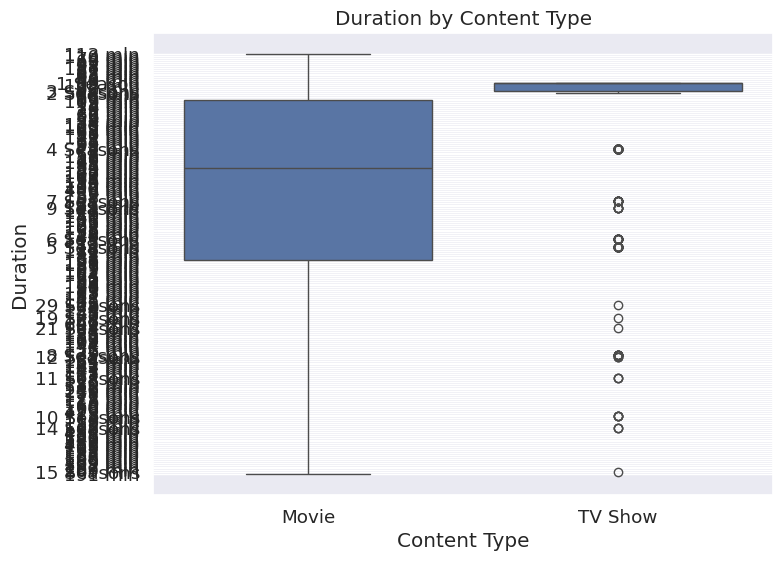

In [ ]:
# Example: Boxplot of 'duration' by 'type'
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='duration', data=df) #use df instead of data
plt.title('Duration by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.show()

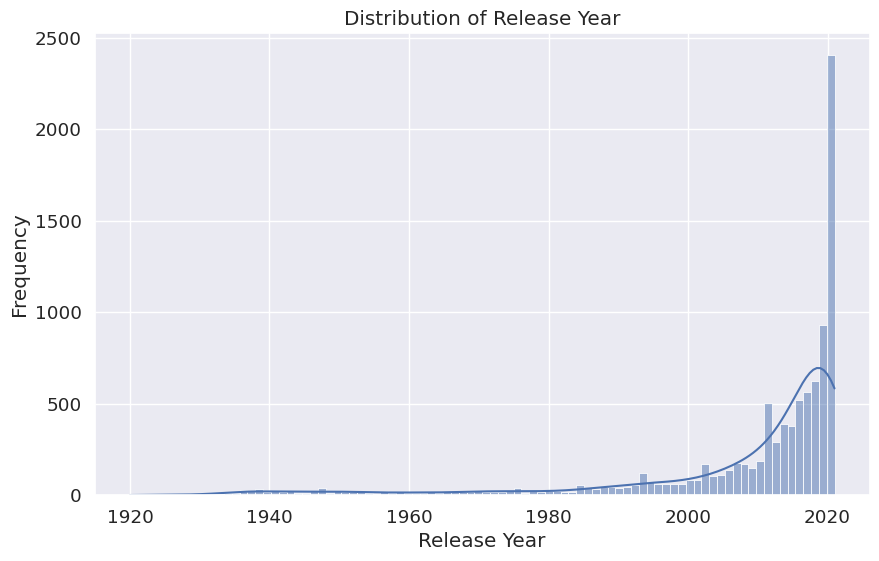

In [ ]:
# Visualize the distribution of release years
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

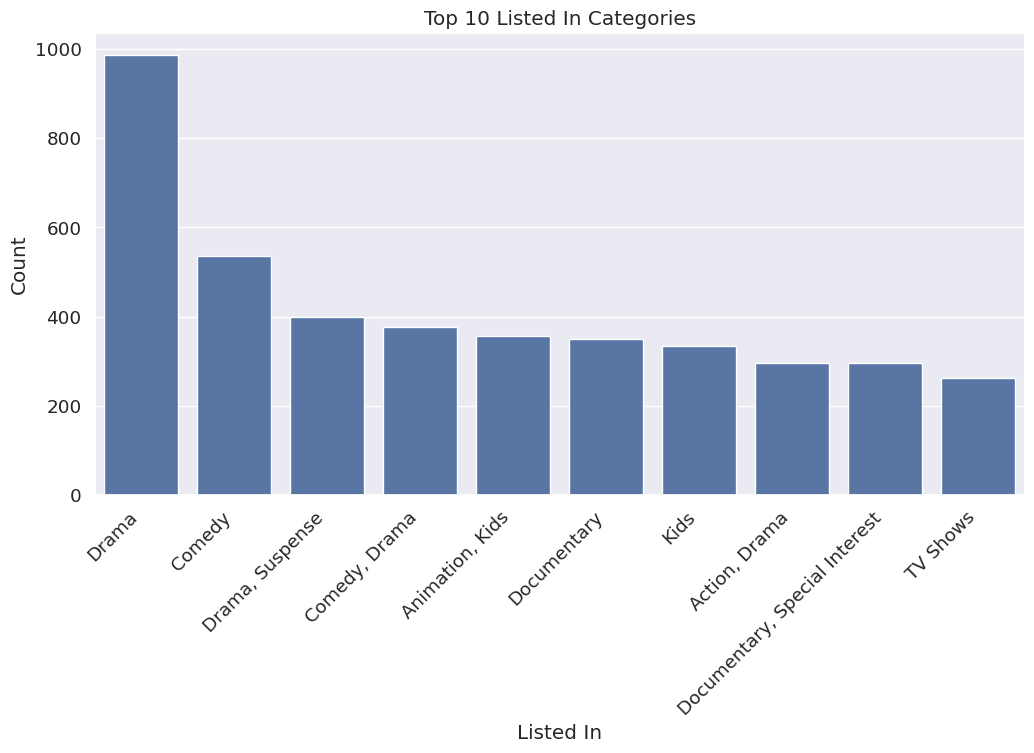

In [ ]:
# Visualize the top 10 listed in categories
top_listed_in = df['listed_in'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_listed_in.index, y=top_listed_in.values)
plt.title('Top 10 Listed In Categories')
plt.xlabel('Listed In')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

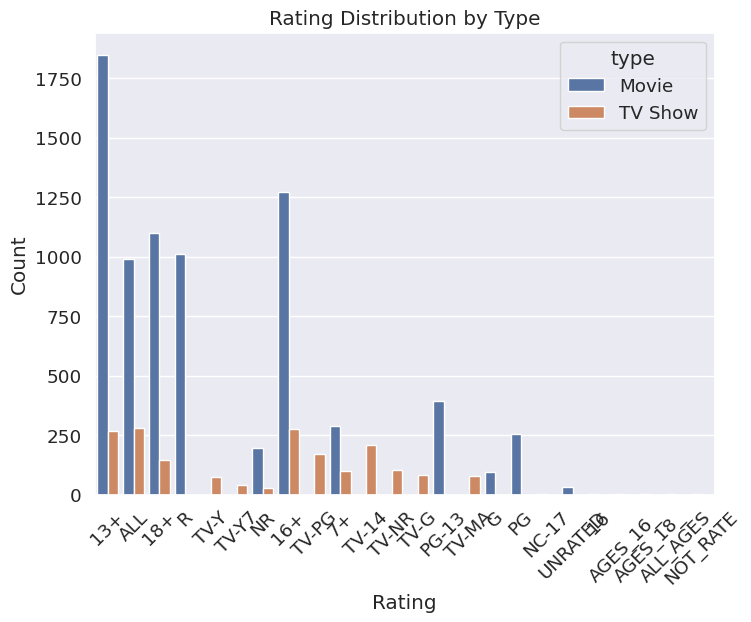

In [ ]:
# Analyze rating distribution by type
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', hue='type', data=df)
plt.title('Rating Distribution by Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()